# Jupyter Notebook Interface of SoS

[Jupyter](http://jupyter.org/) notebook is a web application that allows you to create documents with live code and results. The underlying interpreters of the cells are called **kernel**. For example, you can use a `python` kernel to interpret python expressions, or a `ir` kernel to interpret `R` commands. You can use sos within a `python` kernel by loading the [`sos_magic` ipython extension](../tutorials/Using_SoS_with_IPython.html), or use a `sos` kernel to work in a complete SoS environment.

Comparing to a regular Jupyter notebook, the SoS Jupyter notebook provides the following features:

* **Enhanced Python3 kernel** The SoS kernel is based on Python 3 but it provides additional features such as string interpolation.
* **Full-blown workflow system** SoS is a workflow system that defines many functions (actions) to execute scripts in different languages.
* **Multi-Kernel notebook** In addition to the ability to execute SoS workflows within Jupyter, the SoS kernel allows you to start subkernels (e.g. [`irkernel`](https://github.com/IRkernel/IRkernel) for [the R langauage](https://www.r-project.org/)) and switch between the subkernels in the same notebook. This allows for truly integrated data analysis using different langauages.
* **Data-exchange between kernels** Using a data exchange mechanism, SoS allows you to exchange variables between supported languages either explicitly, or implicitly for variables with names starting with `sos`.
* **Scratch-pad** You can evaluate any statement in a side panel without effecting the main notebook. This provides a scratch pad for you to test your scripts before incorporating them to the main notebook.
* **Line-by-line execution** SoS provides a shortcut (Ctrl-Shift-Enter) for you to send selected text or current line to the panel cell for evaluation, allowing you to step through code cell for easy debugging.
* **Preview of variables and files** A magic `%preview` is provided to preview files and variables (and expressions) in multiple kernels. The output of the preview magic is displayed in the side panel (if the panel is open) which effectively reduces the size of the main notebook.

## Installing the SoS kernel

The SoS installation process will install a SoS kernel by default. To verify if you have the sos kernel installed, use command `jupyter kernelspec list` from command line (here we use the `!` magic to run commands from Jupyter notebook):

In [1]:
!jupyter kernelspec list

Available kernels:
  python3    /Users/bpeng1/anaconda/lib/python3.6/site-packages/ipykernel/resources
  bash       /Users/bpeng1/Library/Jupyter/kernels/bash
  python2    /Users/bpeng1/Library/Jupyter/kernels/python2
  ir         /Users/bpeng1/anaconda/share/jupyter/kernels/ir
  sos        /Users/bpeng1/anaconda/share/jupyter/kernels/sos


and check if you have `sos` listed as one of the kernels. If not, try to re-install SoS using `pip3 install sos --upgrade` or clone SoS locally and run `python setup.py install`. If the kernel is installed, fire Jupyter using command
```
$ jupyter notebook
```
from the `New` button to the top right corner, select `SoS`, and create a SoS notebook.

You can also start a qtconsole with the SoS kernel using command
```
$ jupyter qtconsole --kernel sos
```
or even [use the SoS kernel in Spyder](../tutorials/Using_SoS_with_Spyder.html). Most of the features described in this section also applies to `qtconsole` and `spyder`.

Note that SoS uses [imagemagick](http://www.imagemagick.org/script/index.php) and python package [`wand`](http://docs.wand-py.org/en/0.4.2/) to preview output files so it is recommended that you install these packages.

## User Interface

![user_interface](../../img/JupyterNotebook.png)

The SoS frontend is based on the Jupyter notebook frontend but adds a dropdown list and a button to the menu bar, a side panel, and dropdown lists for all code cell.

### Single cell operation

A cell can either be a Markdown cell or a code cell. The markdown cells accept texts in markdown format and are used to generate descriptions of your notebook. The code cell starts with comments (lines starting with `#`), SoS magics (lines starting with `%`), shell commands (lines  starting with `!`), followed by statements that can be evaluated by either a SoS kernel (based on Python3), or any of the subkernels that Jupyter supports.

We will discuss SoS magics in details later but basically these magic statements control how SoS works. For example, a `%with` magic temporarily switches to the specified kernel and uses it to evaluate the content of the cell, and a `%preview` magic displays information on variables or files after the completion of the cell.

In [2]:
%with R
%preview title
title <- paste('A', c(1, 2, 3))

%preview title

>>> title:

[1] "A 1" "A 2" "A 3"

Using the default SoS kernel, you can enter

* any SoS (Python) expression and statements. For example, you can write pieces of SoS code and evaluate them

In [3]:
res_path = '/path/to/resource'
ref_genome = "${res_path}/hg19"

* any SoS actions in function or script format. For example, you can execute a shell script using

In [4]:
run:
    echo Reference genome is located at ${ref_genome}

Reference genome is located at /path/to/resource/hg19


* SoS workflows with one or more steps.

In [5]:
# a complete workflow
[10]
print("I am in ${step_name}")
[20]
print("I am in ${step_name}")
[30]
print("I am in ${step_name}")

I am in default_10
I am in default_20
I am in default_30


Technically speaking, SoS prefixes input with a default header if no header is present, and execute all input as SoS workflows. The major differences between running SoS scripts in batch mode and Jupyter notebook is the scope of variables. Whereas in Jupyter notebook all scripts are executed in the same namespace (SoS dictionary) with shared variables, SoS batch mode executes each step in separate processes with their own namespaces, with additional rules such as readonly global variables.

### Switch between kernels

You can also enter any statement for any other (installed) kernel after you switch to the subkernel. The switch can be down either programmatically using magics `%with` or `%use`, or interactively using the language selection drop downs.

1. A dropdown list at the top right corner of each cell displays the current kernel for the cell. You can change the kernel used for the cell by selecting another kernel from the list. This will start the cell with the specified kernel, although another kernel can still be used if the cell contains kernel switching magics `%use` or `%with`.

2. A dropbown list in the notebook toolbar lists the global default kernel that would be used for new cell. Changing the kernel from the tool bar effectively executes a `%use KERNEL` command. It will also change the kernel of any new cell to that kernel.

### Side panel

SoS provides a side panel that can be toggled by a cube icon next to the language selection dropdown. The side panel contains a special cell that is used for two purposes:

1. A scratch cell using which you can evaluate any expression and check its results. You can either input (or copy/paste the statement) into the cell, or use shortcut `Ctrl-Shift-Enter` to **send selected text or current line to the panel cell for evaluation**. The latter effectively allows you to evaluate content of a cell line by line.
2. A preview cell in which the `%preview` magic of any cell would be executed if the side panel is open.

Because this cell is not part of the main notebook, its output will not be saved with the notebook. This allows you to test commands, check environment, values of variables and content of files without affecting the content of the notebook.


## Use of subkernels

One of the most important features of the SoS kernel is its support for multiple Jupyter subkernel. A `subkernel` can be any [Jupyter supported kernels](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages) that have been installed locally. In particular, you can use `ir` for R kernel, `python3` for python3, `iperl` for perl, `bash` for bash. Please refer to [IRKernel](https://github.com/IRkernel/IRkernel) for instructions on how to install the `ir` kernel for `R`.

### Kernel switch magics

You can switch kernels using SoS magics or interactively if you are using a Jupyter notebook. Using a `%use kernel` magic, you can start (and/or switches to) an alternative jupyter kernel and use a completely different script in the same notebook.

For example,

In [6]:
%use R

starts and switches to a `ir` kernel so that you can enter any R commands as if you are working on a notebook with a `ir` kernel. Note that `R` stands for a SoS language extension that uses kernel `ir` and you have to use the kernel name (e.g. `iperl`) if there is no language extension for the kernel.

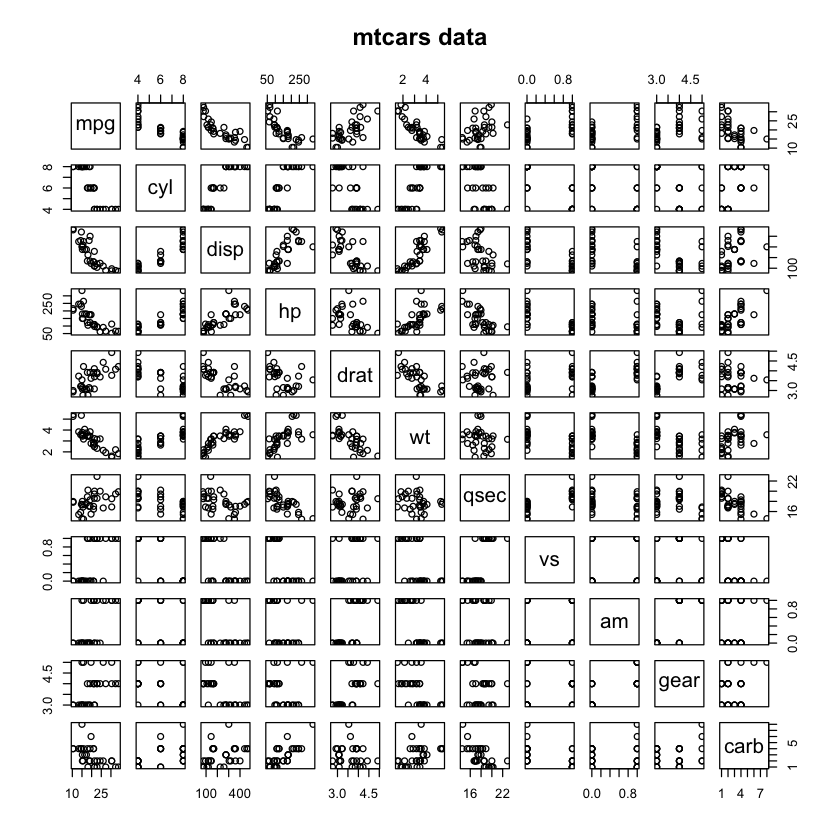

In [7]:
require(graphics)
pairs(mtcars, main = "mtcars data")

As you can see, a different style is used for cells executed by the `ir` kernel. After you are done with the `ir` kernel, you can switch back to the SoS kernel using magic

In [8]:
%use sos

The `%use` magic switches to a new default kernel that would be used for any new cell, but it does not change the kernel of existing cells. The `ir` kernel will still be used if you re-evaluate the above cell in `R`.

SoS will interpolate cell content before it is passed to the subkernel. For example, if you save a dataframe to a file with name in `filename`,

In [9]:
import pandas as pd
import numpy as np
data = pd.DataFrame(np.random.randn(6,4),columns=list('ABCD'))
filename = 'mydata.csv'
data.to_csv(filename, index=False)
data

A         B         C         D
0  0.275887 -0.233462  1.175478  2.240125
1 -1.012035  0.764390 -0.771404  1.437744
2 -0.397193 -0.194880  1.491579 -1.426696
3  0.195616 -1.479170 -1.379833  0.883853
4 -1.058590  1.213018  0.412828  0.313757
5  0.668916  2.584890  3.080347  1.340074

you can pass the filename to kernel `ir` using `${filename}` as follows

In [10]:
%use R
d <- read.csv(${filename!r})
d

d <- read.csv('mydata.csv')
d
## -- End interpolated command --


A          B          C          D         
1  0.2758866 -0.2334616  1.1754784  2.2401249
2 -1.0120349  0.7643897 -0.7714036  1.4377438
3 -0.3971928 -0.1948802  1.4915789 -1.4266956
4  0.1956157 -1.4791702 -1.3798330  0.8838532
5 -1.0585896  1.2130177  0.4128283  0.3137568
6  0.6689165  2.5848901  3.0803473  1.3400738

### Explicit data exchange

Although string interpolation allows you to **compose** scripts in other languages, it is not a particularly good way to exchange data between SoS and subkernels. Fortunately, the SoS kernel provides a mechanism to pass variables between SoS and some subkernels using SoS magics.

For example, magic `%get` can get specified SoS variables from the SoS kernel to the subkernel `ir`.

In [11]:
%get data
data

A          B          C          D         
0  0.2758866 -0.2334616  1.1754784  2.2401249
1 -1.0120349  0.7643897 -0.7714036  1.4377438
2 -0.3971928 -0.1948802  1.4915789 -1.4266956
3  0.1956157 -1.4791702 -1.3798330  0.8838532
4 -1.0585896  1.2130177  0.4128283  0.3137568
5  0.6689165  2.5848901  3.0803473  1.3400738

SoS tries its best to find the best-matching data types between SoS and the subkernel and convert the data in the subkernel's native datatypes (e.g. Python's `DataFrame` to R's `data.frame`), so the variables you get will always be in the subkernel's native data types, not a wrapper of a foreign object (for example objects provided by `rpy2`). 

In [12]:
class(data)

[1] "data.frame"

Similarly, using magic `%put`, you can put a variable in the subkernel to the sos kernel.

In [13]:
data[ data < 1] = 0
data[ data > 1] = 1

In [14]:
%put data

In [15]:
%use sos
data

A    B    C    D
0  0.0  0.0  1.0  1.0
1  0.0  0.0  0.0  1.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  0.0
4  0.0  1.0  0.0  0.0
5  0.0  1.0  1.0  1.0

Variables can also be transferred with options `--in` (`-i`) and `--out` (`-o`) of magics `%use` and `%with`. For example, if you would like to add `2` to all elements in `data` but not sure if `pandas` can do that, you can send the dataframe to `R`, add `2` and send it back.

In [16]:
%with R -i data -o data
data <- data + 2

In [17]:
data

A    B    C    D
0  2.0  2.0  3.0  3.0
1  2.0  2.0  2.0  3.0
2  2.0  2.0  3.0  2.0
3  2.0  2.0  2.0  2.0
4  2.0  3.0  2.0  2.0
5  2.0  3.0  3.0  3.0

### Implicit data exchange

In addition to the use of magics `%put` and `%get` and parameters `--in` and `--out` of magics `%use` and `%with` to explicitly exchange variables between SoS and subkernels, SoS automatically shares variables with names starting with `sos` among all subkernels.

For example,

In [18]:
%use R
sos_var = 100

In [19]:
%with Python
sos_var += 100
print("sos_var is changed to {}".format(sos_var))

Failed to start kernel "Python". Use "jupyter kernelspec list" to check if it is installed: No such kernel named Python


sos_var is changed to 200


In [20]:
# I am still in R
sos_var

[1] 200

In [21]:
%use sos
sos_var

200

SoS supports an increasing number of languages and provides [an interface to add support for other languages](Extending_SoS.html). If your language of choice is not yet supported, please considering adding SoS support for your favoriate kernel with a pull request.

In [22]:
# clean up
%use sos
!rm mydata.csv 

## SOS Magics

In addition to SoS statements, you can use a few SoS magics in Jupyter notebook. 

1. SoS magics have to be specified at the beginning of a cell, although they can be specified after empty lines and comments.
2. Lines ending with `"\"` will be joined so you can break long magics into multiple lines
3. Multiple magics can be used in a single cell.

SoS supports the following jupyter magics:

###  `%use` 

As shown above, the `%use kernel` magic starts or switch to a subkernel named `kernel`.The kernel will be used for the current cell and any new cell, but not for existing cells created with another kernel. The kernel can be any locally installed Jupyter kenel, or name of a **language** (e.g. `R` for kernel `ir`). A `language` is usually built upon the corresponding subkernel, with added support for data exchange between SoS and the subkernel.

`%use` magic accepts parameters `--in (-i)` and `--out (-o)`, followed by variables that will be transferred to the subkernel after starting (or switching to) the subkernel, and variables that will be transferred back to SoS before magic `%use sos`.

For example,

In [23]:
n = 5

In [24]:
%use ir -i n -o ran
ran <- rnorm(n)

In [25]:
%use sos
ran

[-0.678748137597107,
 1.37734307519714,
 -2.29459165066577,
 -0.459186086433596,
 -0.348851687928323]

Data exchange is actually performed by magics `%get` and `%put` so please refer to these magics for details.

### `%with`

  `%with kernel` also starts (or switches to) a subkernel, but kernel specified by `%with kernel` will be reset as soon as the cell is executed. This magic is therefore suitable for a quick errand to another kernel. This magic also accepts options `--in` (or `-i`) and `--out` (or `-o`), so you could use

In [26]:
%with R -i n -o ran
ran <- rnorm(n)

to get a list of normally distributed numbers using R's `rnorm` function. The current kernel is still `sos`.

In [27]:
%use

Kernel "sos" is used.
Available kernels are: SoS (sos), R (ir), Python2 (python2), Python3 (python3), Bash (bash).

In [28]:
ran

[0.548159018750351,
 -0.532398339110057,
 -1.14046027233028,
 -0.13325144306041,
 0.0240346471836994]

### `%preview`

The `%preview` magic preview the content of specified files or values of specified expressions **after** the execution of the current cell. For example, in a subkernel R, you can do

In [29]:
%sandbox
%use R
%preview a.png
png("${os.getcwd()}/a.png")
plot(seq(1,10))
dev.off()

png("/private/var/folders/ys/gnzk0qbx5wbdgm531v82xxljv5yqy8/T/tmpcew07tng/a.png")
plot(seq(1,10))
dev.off()
## -- End interpolated command --


pdf 
  2

%preview a.png

> a.png (13.5 KiB):

Failed to load previewer imghdr:what,1 = sos.jupyter.preview:preview_img [image]: The 'wand' distribution was not found and is required by the application

to preview `a.png` generated by this step. Note that SoS automatically previews output files of SoS statements specified by the `output:` directive, but `output:` works only in the SoS kernel and `%preview` works for subkernel.

The `%preview` magic also accept sos variable and expressions. For example,

In [30]:
%preview data
%use sos
import pandas as pd
data = pd.DataFrame({
    'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])})

%preview data

>>> data:

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

would display the content of the pandas `DataFrame`. You can specify any Python (sos) expression for this magic but, similar to command line arguments, you will need to quote the expression if it contains spaces. For example,

In [31]:
%preview data['one']

%preview data['one']

>>> data['one']:

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

The `%preview` magic previews the variables with the kernel using which the cell is evaluated. For example, you can preview a R variable

In [32]:
%with R
%preview r.val
r.val = rep(c(1, 2), 3)

%preview r.val

>>> r.val:

[1] 1 2 1 2 1 2

If you would like to preview variable in another kernel, you can specify it using option `--kernel`, for example, the following cell previews a variable `r.val` in a SoS kernel.

In [33]:
%preview r.val --kernel R

%preview r.val

>>> r.val:

[1] 1 2 1 2 1 2

Magic `%preview` also accepts an option `--off`, in which case it turns off the preview of output files from the SoS workflow.

If the side panel of the notebook is open, the `%preview` magic would be executed in the side panel. Otherwise it would be executed in the current cell with its result being part of the main notebook. Because SoS also provides an inspection feature that allows you to inspect the value of variables interactively, you have a number of choices to inspect sos variables and preview files. In summary,

1. If you just want to check the value of a variable, you can inspect it by pressing `Shift-Tab` when you move your cursor in or after the variable. A popup window would appear with information about the variable. This only works for SoS variables.
2. You can evaluate variables and expressions or use `%preview` magic in the side panel to preview variables and files. You can select another kernel and check variables in a subkernel.
3. You can use the `%preview` magic to automatically preview variables and files after the execution of the cell. You will need to open the side panel if you do not want to keep the preview result in the main notebook.

### `%put`

Magics `%put` are used to return results from subkernel to SoS kernel when the current kernel is a subkernel started by magic `%use`. Only the `ir` and `python` kernels are supported now. Whereas there is virtually no limit on exchangeable datatypes between `SoS` and `python` kernels, there are no perfect map between Python (SoS) and `R` datatypes so SoS tries to find the best match between data types. More specifically,

  
  | R  |  length (n) |   Python |
  | --- | --- |---|
  | `NULL` | |    `None` |
  | `logical` |  `1` |  `oolean` |
  | `integer` |  `1` |  `integer` |
  | `numeric` |  `1` |  `double` |
  | `character` |  `1` |  `string` |
  | `logical` |  `n > 1` |  `list` |
  | `integer` |  `n > 1` |  `list` |
  | `numeric` |  `n > 1` |  `list` |
  | `character` |  `n > 1` |  `list` |
  | `list` without names |  `n > 0` | `list` |
  | `list` with names |  `n > 0` |  `dict` |
  | `matrix` |  `n > 0` |  `numpy.array` |
  | `data.frame` |  `n > 0` |  `DataFrame` |

For example

In [34]:
%use R
a = c(1)
b = c(1, 2, 3)
c = list(1, 2, 3)
d = list(1, 2, "3")
e = matrix(c(1,2,3,4), ncol=2)

In [35]:
%put a b c d e
%preview a b c d e

%preview a b c d e

>>> a:

[1] 1

>>> b:

[1] 1 2 3

>>> c:

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

>>> d:

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] "3"

>>> e:

[,1] [,2]
[1,] 1    3   
[2,] 2    4

As you can see, although `a` is technically an array with length 1 in `R`, it is convertered to an integer in SoS. Variables `b` and `c` are converted to the same type (`list`) although they are of different types in `R`. Variable `e` are converted from `R` matrix to `numpy` array. 

Sometimes a valid variale name in a subkernel is not a valid name in SoS/Python. SoS would automatically convert such names with a warning message. For example,

In [36]:
.a.b = 5

In [37]:
%put .a.b
%preview _a_b --kernel sos

Variable .a.b is put to SoS as _a_b


%preview _a_b

>>> _a_b:

5

In addition to putting variables from subkernel to SoS, you can also put variables from SoS to subkernel, or from any subkernel to another, using parameter `--to`. For example,

In [38]:
R_var <- 'R variable'

In [39]:
%put --to Python3 R_var

In [40]:
R_var

'R variable'

### `%get`

Magics `%get` retrieve variables from the SoS to the current subkernel started by magic `%use`. Only the `ir` and `python` kernels are currently supported. SoS tries to use the best matching data type for the conversion. More specifically,

  
  | Python  |  condition |   R |
  | --- | --- |---|
  | `None` | |    `NULL` |
  | `boolean` |   | `logical` |
  | `integer` |  |  `integer` |
  | `float` |  |  `numeric` |
  | `str` |  | `character` |
  | Sequence (`list`, `tuple`, ...) |  homogenous type |  `c()` |
  | Sequence (`list`, `tuple`, ...) |  multiple types |  `list` |
  | `set` |  |  `list` |
  | `dict` |  |  `list` with names |
  | `numpy.ndarray` |  | `c()` array |
  | `numpy.matrix` |  | `matrix` |
  | `pandas.DataFrame` |  |  R `data.frame` |

  Python objects in other datatypes are transferred as string `"Unsupported datatype"`.

For example,

In [41]:
%use sos
a = [1, 2, 3]
b = [1, 2, "3"]
c = True

In [42]:
%use R
%get a b c
a

[1] 1 2 3

In [43]:
b

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] "3"

In [44]:
c

[1] TRUE

The `%preview` magic cannot be used to preview variables in the subkernel so we have to list them one by one. As you can see, a Python list can be converted to `R` array or list depending on its content. 

Similar to the `%put` magic, SoS automatically translate variables with invalid Python names. For example

In [45]:
%use sos
_var = 'Hi, Bob'

In [46]:
%use R
%get _var
.var

Variable _var is passed from SoS to kernel ir as .var


[1] "Hi, Bob"

In [47]:
%use sos

Also similar to the `--to` option of magic `%put`, magic `%get` accept a parameter `--from` to get variables from SoS (default) any kernel. For example,

In [48]:
R_var <- 'R variable'

In [49]:
%get --from R R_var
R_var

'R variable'

### `%paste`

This magic pastes content of clipboard to the cell and execute the cell. It is similar but sometimes more convenient than pasting the content using system shortcuts such as `Cmd-V` (mac). The additional options allow you to execute the pasted workflow with these options (see magic `%run` for details).

### `%runcell`

The `%runcell` magic allows you to run the content of a cell as a SoS workflow with specify SoS options such as `-v` (verbosity), `-j` (max number of jobs), and workflow options as defined by `parameter:` keyword. A complete list of arguments can be shown using the `-h` option.

In [50]:
%use sos
%runcell -h

usage: run [-h] [-J EXTERNAL_JOBS] [-c CONFIG_FILE] [-t FILE [FILE ...]]
           [-b [BIN_DIR [BIN_DIR ...]]] [-q [QUEUE]] [-w] [-W]
           [-r [REPORT_FILE]] [-n] [-s SIGMODE] [-d [DAG]] [-v {0,1,2,3,4}]
           [WORKFLOW]

Execute default or specified workflow defined in script

positional arguments:
  WORKFLOW              Name of the workflow to execute. This option can be
                        ignored if the script defines a default workflow (with
                        no name or with name `default`) or defines only a
                        single workflow. A subworkflow or a combined workflow
                        can also be specified, where a subworkflow executes a
                        subset of workflow (`name_steps` where `steps` can be
                        `n` (a step `n`), `:n` (up to step `n`), `n:m` (from
                        step `n` to `m`), and `n:` (from step `n`)), and a
                        combined workflow executes to multiple (sub)wor

### `%run`

The `%run` option is a very special magic in that it **executes SoS steps defined in the entire notebook**. Essentially speaking, this magic

* Collect the content of all SoS cells in the notebook that starts with a section header. Comments and magics before section header is allowed and is ignored.
* Append the steps to the content of the step.
* Execute the entire workflow with options specified by magic `%run`, as if executed from command `sos run`.

For example,

In [51]:
[global]
# this is the global section of a workflow
gvar = 20

In [52]:
[workflow_10]
print("This is step ${step_name}")

This is step workflow_10


In [53]:
[workflow_20]
print("This is step ${step_name}")

This is step workflow_20


In [54]:
%run workflow

This is step workflow_10
This is step workflow_20


The content of the workflow is displayed at the side panel (if opened) so that you know what has been collected. Using the workflow feature of SoS, you can execute cells of a notebook conditionally, repeatedly, with different parameters...

The following example demonstrates how to execute a step repeated as a nested workflow of another workflow.

In [55]:
# this is a worker step
[worker]
parameter: val = 5
sh:
    echo process ${val}

process 5


In [56]:
# this step will execute the previous cell multiple times
%run batch
[batch]
input: for_each={'val': range(5)}
sos_run('worker',val=val)

process 0
process 1
process 2
process 3
process 4


### `%rerun`

The `%rerun` magic re-executed the last script, which is basically content of the last cell without the magics. This allows you to re-run the last cell with or without a new set of parameters. Note that cells without a script (e.g. a cell with only magics) does not change the last executed script.

In [57]:
parameter: a = 10
[10]
print("a is set to ${a}")

a is set to 10


In [58]:
%rerun --a 20

a is set to 20


### `%set`

The `%set` magic sets a persistent sos options so you do not have to enter them each time after `%run` or `%paste`. For example, if you set `%set -v3`, you can execute all cells in the notebook at verbosity level 3 (`DEBUG`).

Note that this magic only accepts keyword arguments (with leading `-` or `--`) so you cannot use it to specify a default workflow to execute.

In [59]:
%set -v2
[cat_10]
[cat_20]

Set sos options to "-v2"


INFO: Executing cat_10: 
INFO: input:    []
INFO: output:   []
INFO: Executing cat_20: 
INFO: input:    []
INFO: output:   []


In [60]:
%set -v1
[mouse_10]
[mouse_20]

Set sos options to "-v1"


### `%matplotlib`

Similar to ipython's `matplotlib` magic, the `%matplotlib inline` magic allows the display of matplotlib figures inline in Jupyter notebook or qtconsole.

In [61]:
%matplotlib inline

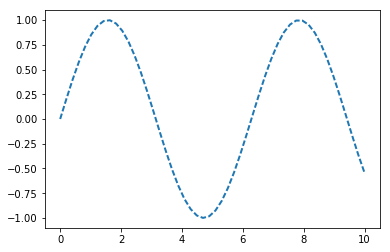

In [62]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10)
plt.plot(x, np.sin(x), '--', linewidth=2)
plt.show()

### `%restart`

`%restart` specified kernel without affecting the current working kernel. 

### `%dict` 

The `%dict` magic lists or rests the content of SoS dict, using syntax

```
%dict [-a|-all] [-k|--keys] [-r|--reset] [var1] [var2] ...
```

where

* `var1`, `var2` etc are name of variables. All variables will be displayed if no variable is specified.
* `-a|-all`: list all dictionary keys, including SoS functions and variables.
* `-k|--keys`: list only keys, not their values
* `-r|--reset`: reset the dictionary to its original content (with only SoS internal values)

For example, you can see all keys in the SoS dictionary using

In [63]:
%dict --keys

{'R_var',
 '_a_b',
 '_depends',
 '_index',
 '_input',
 '_local_input_0',
 '_local_input_1',
 '_local_input_2',
 '_local_input_3',
 '_local_input_4',
 '_local_output_0',
 '_local_output_1',
 '_local_output_2',
 '_local_output_3',
 '_local_output_4',
 '_output',
 '_runtime',
 '_var',
 'a',
 'b',
 'c',
 'd',
 'data',
 'e',
 'filename',
 'gvar',
 'local_input',
 'local_output',
 'n',
 'np',
 'pd',
 'plt',
 'ran',
 'ref_genome',
 'res_path',
 'sos_var',
 'val',
 'x'}

and reset the dictionary with the `--reset` option

In [64]:
%dict --reset
%dict --keys

set()

### `%sandbox`

The `%sandbox` magic executes the current cell in the temporary directory with a separate dictionary so that it would change SoS dictionary and files in the current directory. 

This magic accepts three parameters:

1. If `-d` or `--dir` is specified, sandbox will use the specified directory. It will create the directory if it is does not exist, and will not clean or remove the directory after the completion of execution.
2. If `-k` or `--keep-dict` is specified, the cell would use the existing SoS dictionary instead of creating a new one.
3. If `-e` or `--expect-error` is specified, the cell expects an error and would return `ok` only if an `error` occurs. In practice, this option would prevent Jupyter from stopping at a cell that expects an error when you execute the whole notebook with "execute all".

For example, this `ls` commands happens at the current directory

In [65]:
!ls Auxil*

Auxiliary_Steps.ipynb


but the notebook is not available in the sandbox

In [66]:
%sandbox
!ls Auxil*

ls: Auxil*: No such file or directory


and the sandbox dictionary is empty

In [67]:
%sandbox
%dict --keys

set()

Note that the working directory of subkernels is not affected by the `%sandbox` magic.

### `%cd`

Change the current working directory of the SoS kernel to `dir`. The working directory of started subkernels is not affected.

### `!shell-command`

If any other command is entered after `!`, sos will treat the rest of the line as a shell command and execute it. Only single-line commands are supported. String interpolation is supported. Note that `!cd` does not change the current working directory because the command is executed in a separate process. Use magic `%cd` for that purpose.

The command line would accept string interpolation so you can for example do

In [68]:
import tempfile
filename = tempfile.mkstemp()[1]
with open(filename, 'w') as out:
  out.write('something\n')    

In [69]:
!cat ${filename}

cat /var/folders/ys/gnzk0qbx5wbdgm531v82xxljv5yqy8/T/tmpbhqhy3qx
## -- End interpolated command --
something


In [70]:
# clean up
!rm ${filename}

rm /var/folders/ys/gnzk0qbx5wbdgm531v82xxljv5yqy8/T/tmpbhqhy3qx
## -- End interpolated command --


## Code completion and variable inspection

Code completion are very useful for you to work with a SoS environment. For example, you can enter `<tab>` in
```
%<tab>
```
to get a list of available magics, in
```
%get <tab>
```
to get a list of available variables, in
```
%get dat<tab>
```
to get a list of all variables starting with name `dat`, in
```
%cd ~/<tab>
```
to get a list of all files under the home directory, and in
```
prin<tab>
```
to complete the function call to `print` if `prin` matches only `print` in the SoS namespace.

Variable inspection is an often-forgotten feature that can be really useful when you work with the SoS kernel. Basically, if you land your cursor on any sos variable or keyword, enter `<Shift-Tab>` to get some information about the variable or keyword. It is often more convenient to use than the `%preview` magic especially if you do not want to keep the output in the notebook. 

## Conversion between `.ipynb` and `.sos` files

You can save a Jupyter notebook with SoS kernel to a SoS script using `File -> Download As -> SoS` from the browser, or using command

```
$ sos convert myscript.ipynb myscript.sos
```

You can also convert an `.sos` script to `.ipynb` format using command

```
$ sos convert myscript.sos myscript.ipynb
```

or even to an executed notebook with option `--execute`

```
$ sos convert myscript.sos myscript.ipynb --execute
```

Please refer to the tutorial on [File Conversion](../tutorials/File_Conversion.html) for details of these commands.